In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [ ]:
df = pd.read_csv("kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df.id

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.columns = ['age','blood_pressure','specific_gravity','albumin', 'sugar', 'red_blood_cells','pus_cell','pus_cell_clumps', 'bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','annemia','class']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume, errors = 'coerce')

In [ ]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [ ]:
# df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(float, errors == 'ignore')

In [ ]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors = 'coerce')

In [ ]:
df['white_blood_cell_count'] = df['white_blood_cell_count'].astype(int, errors = 'ignore')

In [ ]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [ ]:
df['red_blood_cell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red_blood_cell_count, Length: 400, dtype: object

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'annemia',
 'class']

In [ ]:
num_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'annemia',
 'class']

In [ ]:
for col in cat_cols:
  print(f"{col} has{df[col].unique()} values. \n")

red_blood_cells has[nan 'normal' 'abnormal'] values. 

pus_cell has['normal' 'abnormal' nan] values. 

pus_cell_clumps has['notpresent' 'present' nan] values. 

bacteria has['notpresent' 'present' nan] values. 

red_blood_cell_count has['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8'
 '\t?' '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9'
 '6.5'] values. 

hypertension has['yes' 'no' nan] values. 

diabetes_mellitus has['yes' 'no' ' yes' '\tno' '\tyes' nan] values. 

coronary_artery_disease has['no' 'yes' '\tno' nan] values. 

appetite has['good' 'poor' nan] values. 

peda_edema has['no' 'yes' nan] values. 

annemia has['no' 'yes' nan] values. 

class has['ckd' 'ckd\t' 'notckd'] values. 



In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\types':'yes','yes':'yes'}, inplace = True)

In [ ]:
df['coronary_artery_disease']=df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')

In [ ]:
df['coronary_artery_disease']

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: coronary_artery_disease, Length: 400, dtype: object

In [ ]:
df['class'] = df['class'].replace(to_replace = {'ckd\t' : 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'].unique()

array(['ckd', 'not ckd'], dtype=object)

In [ ]:
df['class'] = df['class'].map({'ckd' : 0, 'not ckd' : 1})

In [ ]:
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

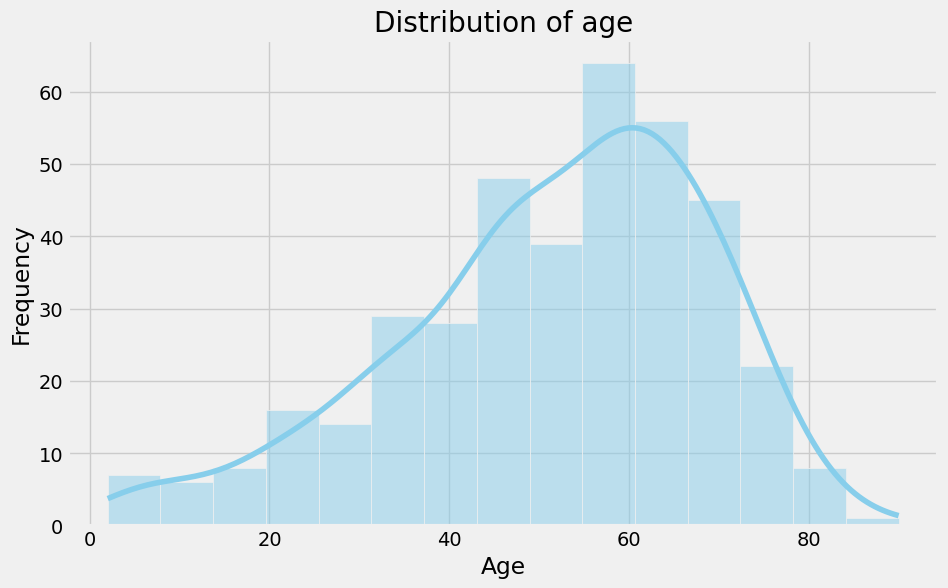

In [ ]:
# univariate analysis

plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde = True, color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# insights
# the mean is around 50
# most of the people are around 40 -60
# 70-80 low number of people

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'annemia', 'class'],
      dtype='object')

In [ ]:
df.hypertension

0      yes
1       no
2       no
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: hypertension, Length: 400, dtype: object

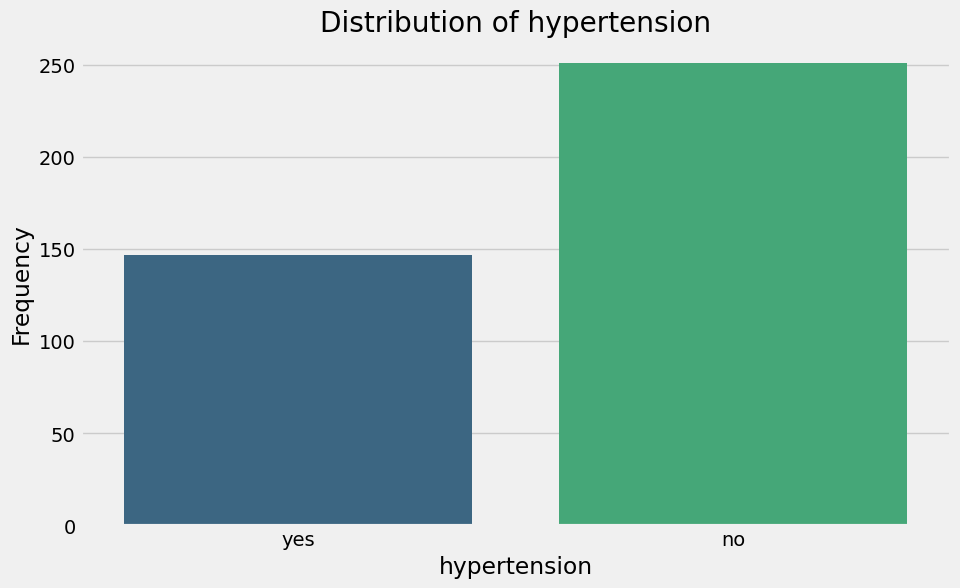

In [ ]:
# how many people having cronid disease has Hypertension

plt.figure(figsize=(10,6))
sns.countplot(x = 'hypertension', data = df, palette = 'viridis' )
plt.title('Distribution of hypertension')
plt.xlabel('hypertension')
plt.ylabel('Frequency')
plt.show()



In [ ]:
def scatter(col1, col2):
  fig = px.scatter(df, x = col1, y = col2, color = "class", template = "plotly_dark")
  return fig.show()

In [ ]:
scatter('haemoglobin', 'packed_cell_volume')

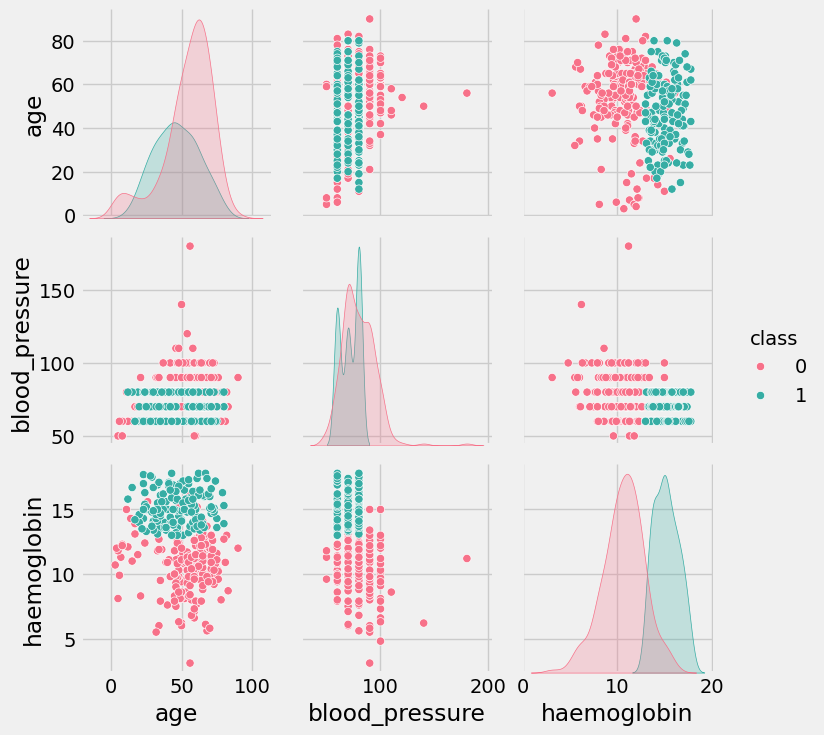

In [ ]:
# multivariable analysis

selected_columns = ['age', 'blood_pressure','haemoglobin', 'class']
sns.pairplot(df[selected_columns], hue = 'class', palette = 'husl')

<Axes: >

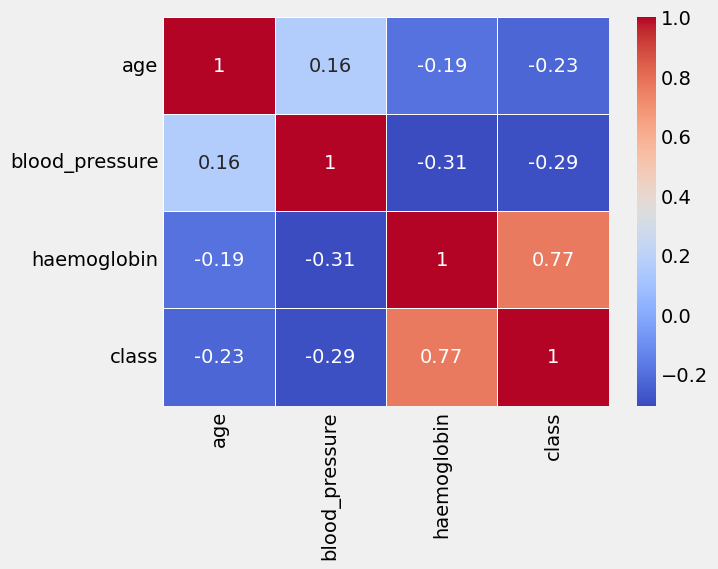

In [ ]:
df[selected_columns].corr()
sns.heatmap(df[selected_columns].corr(),annot = True,cmap = "coolwarm", linewidth = .5 )